In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Input


In [5]:

# Load dataset
TitanicData = pd.read_csv("/content/Titanic.csv")

print(TitanicData.head(3))


   pclass  survived                            name     sex    age  sibsp  \
0       1         1   Allen, Miss. Elisabeth Walton  female  29.00      0   
1       1         1  Allison, Master. Hudson Trevor    male   0.92      1   
2       1         0    Allison, Miss. Helen Loraine  female   2.00      1   

   parch  ticket      fare    cabin embarked boat  body  \
0      0   24160  211.3375       B5        S    2   NaN   
1      2  113781  151.5500  C22 C26        S   11   NaN   
2      2  113781  151.5500  C22 C26        S  NaN   NaN   

                         home.dest  
0                     St Louis, MO  
1  Montreal, PQ / Chesterville, ON  
2  Montreal, PQ / Chesterville, ON  


In [6]:
print(TitanicData.columns)

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')


In [7]:

# Select relevant features and target
features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']
target = 'survived'

TitanicData = TitanicData[features + [target]]

# Handle missing values
TitanicData['age'].fillna(TitanicData['age'].median())
TitanicData['embarked'].fillna(TitanicData['embarked'].mode()[0])


TitanicData.dropna(inplace=True)

# Convert categorical variables
label_enc = LabelEncoder()
TitanicData['sex'] = label_enc.fit_transform(TitanicData['sex'])
TitanicData['embarked'] = label_enc.fit_transform(TitanicData['embarked'])

TitanicData = TitanicData.copy()  # Create an independent copy before modifying

TitanicData.dropna(inplace=True)
TitanicData['sex'] = label_enc.fit_transform(TitanicData['sex'])
TitanicData['embarked'] = label_enc.fit_transform(TitanicData['embarked'])


# Split data
X = TitanicData[features]
y = TitanicData[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [8]:

# Build neural network model
model = keras.Sequential([
    Input(shape=(X_train.shape[1],)),  # Explicit input layer
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy:.4f}')


Epoch 1/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5089 - loss: 0.7253 - val_accuracy: 0.6603 - val_loss: 0.6573
Epoch 2/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6729 - loss: 0.6568 - val_accuracy: 0.7273 - val_loss: 0.6093
Epoch 3/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7717 - loss: 0.5938 - val_accuracy: 0.7703 - val_loss: 0.5683
Epoch 4/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7781 - loss: 0.5427 - val_accuracy: 0.7656 - val_loss: 0.5369
Epoch 5/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7889 - loss: 0.5088 - val_accuracy: 0.7656 - val_loss: 0.5164
Epoch 6/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7910 - loss: 0.4888 - val_accuracy: 0.7703 - val_loss: 0.5061
Epoch 7/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8005 - loss: 0.4664 - val_accuracy: 0.7751 - val_loss: 0.5004
Epoch 8/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7930 - loss: 0.4483 - val_accuracy: 0.7799 - val_loss

In [9]:
predictions = model.predict(X_test)
predictions = (predictions > 0.5).astype(int)  # Convert probabilities to binary outcomes


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [10]:
# Predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [11]:
# Calculate performance metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [12]:
# Compute ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Print evaluation metrics
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')
print(f'Confusion Matrix:\n{conf_matrix}')

Precision: 0.8103
Recall: 0.5595
F1-score: 0.6620
Confusion Matrix:
[[114  11]
 [ 37  47]]


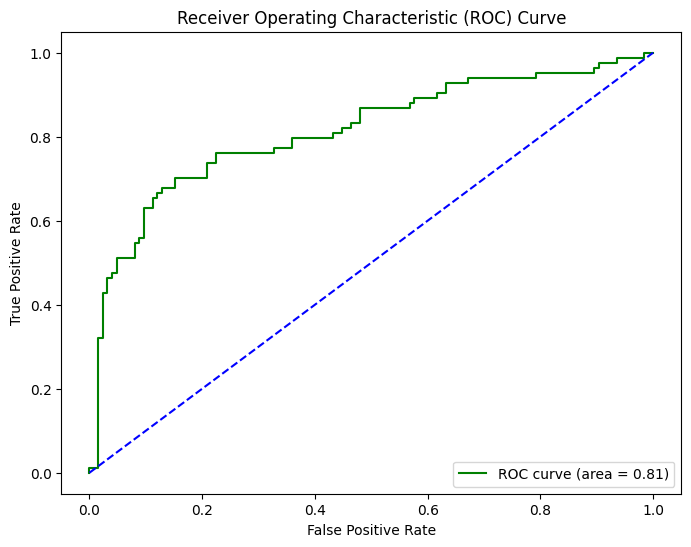

In [13]:
# Plot ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='green', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()